In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
def load_train_data():
    data = pd.read_csv('Acoustic_train.csv')
    return data

def load_test_data():
    data = pd.read_csv('Acoustic_test_no_class.csv')
    return data

In [13]:
train_data = load_train_data()
test_data = load_test_data()

# print(train_data.head())
# print(test_data.head())

In [10]:
X = train_data.drop('Class', axis=1)
y = train_data['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

def create_model(units_1=64, dropout_1=0.3, units_2=64, dropout_2=0.3, learning_rate=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Use the Input layer to specify the shape
        Dense(units_1, activation='relu'),
        Dropout(dropout_1),
        Dense(units_2, activation='relu'),
        Dropout(dropout_2),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/200


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2377 - loss: 1.6385 - val_accuracy: 0.3333 - val_loss: 1.3640
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3026 - loss: 1.5468 - val_accuracy: 0.3833 - val_loss: 1.2944
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3674 - loss: 1.3375 - val_accuracy: 0.4167 - val_loss: 1.2345
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4373 - loss: 1.2292 - val_accuracy: 0.4333 - val_loss: 1.1749
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4981 - loss: 1.1328 - val_accuracy: 0.4833 - val_loss: 1.1068
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5110 - loss: 1.0871 - val_accuracy: 0.6000 - val_loss: 1.0482
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5870 - loss: 1.0288 - val_accuracy: 0.6667 - val_loss: 0.9884
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6073 - loss: 0.9695 - val_accuracy: 0.6500 - val_loss: 0.9271
Epoch 9/200

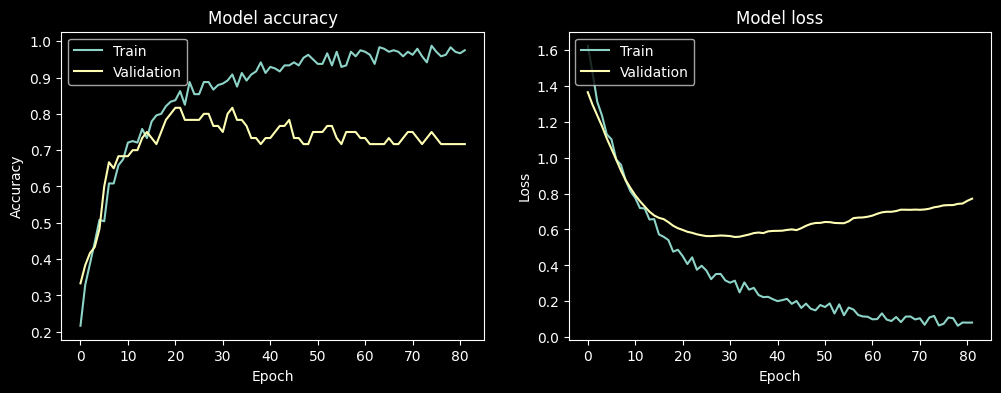

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
